# BREAST CANCER PREDICTION

The Wisconsin Breast Cancer dataset contains information relating to the nuclei of cells extracted from breast cancer tumours.

Class distribution: 356 benign, 212 malignant
Number of instances: 569; Number of attributes: 32

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

The code above imported all the libraries needed for my analysis

In [2]:
MS4S16 = pd.read_csv(r'/Users/apple/Downloads/MS4S16_Dataset.csv') # Creating a path to the file

In [3]:
MS4S16

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302.0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517.0,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903.0,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301.0,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402.0,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,926682.0,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
567,926954.0,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
568,927241.0,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
569,92751.0,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


# DATA PREPROCESSING

# CHECKING FOR NULL VALUES

The dataset that has been provided is not entirely clean as it has some missing values which need to be dealt with before proceeding with our analysis. The code below is used to check for the presence of any missing values. If it returns False, then there are no missing values but if True then it means some values are missing.

In [4]:
MS4S16.isnull().any()

id                         True
diagnosis                  True
radius_mean                True
texture_mean               True
perimeter_mean             True
area_mean                  True
smoothness_mean            True
compactness_mean           True
concavity_mean             True
concave points_mean        True
symmetry_mean              True
fractal_dimension_mean     True
radius_se                  True
texture_se                 True
perimeter_se               True
area_se                    True
smoothness_se              True
compactness_se             True
concavity_se               True
concave points_se          True
symmetry_se                True
fractal_dimension_se       True
radius_worst               True
texture_worst              True
perimeter_worst            True
area_worst                 True
smoothness_worst           True
compactness_worst          True
concavity_worst            True
concave points_worst       True
symmetry_worst             True
fractal_

The code above checks whether there are missing values in the dataset

In [5]:
MS4S16.isnull().sum()

id                          3
diagnosis                   3
radius_mean                 5
texture_mean                6
perimeter_mean              4
area_mean                   5
smoothness_mean             3
compactness_mean            4
concavity_mean              4
concave points_mean         8
symmetry_mean               3
fractal_dimension_mean      4
radius_se                   6
texture_se                  8
perimeter_se                3
area_se                     6
smoothness_se               6
compactness_se              7
concavity_se                8
concave points_se           9
symmetry_se                 8
fractal_dimension_se        7
radius_worst               13
texture_worst              21
perimeter_worst             6
area_worst                  4
smoothness_worst            9
compactness_worst           4
concavity_worst             3
concave points_worst        6
symmetry_worst              4
fractal_dimension_worst    13
dtype: int64

The code above checks the number of missing values in each column

# FILLING THE NULL VALUES

In [6]:
mean_val = MS4S16[['texture_worst', 'radius_worst', 'fractal_dimension_worst', 'smoothness_worst', 'perimeter_worst', 'fractal_dimension_se', 'symmetry_se', 'concave points_se', 'concavity_se', 'compactness_se', 'smoothness_se', 'area_se', 'texture_se', 'radius_se', 'concave points_mean', 'texture_mean', 'id', 'radius_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'symmetry_mean', 'fractal_dimension_mean', 'perimeter_se', 'area_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst']].mean()

The code above was used to calculate the means of all the numerical variables

In [7]:
MS4S16[['texture_worst', 'radius_worst', 'fractal_dimension_worst', 'smoothness_worst', 'perimeter_worst', 'fractal_dimension_se', 'symmetry_se', 'concave points_se', 'concavity_se', 'compactness_se', 'smoothness_se', 'area_se', 'texture_se', 'radius_se', 'concave points_mean', 'texture_mean', 'id', 'radius_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'symmetry_mean', 'fractal_dimension_mean', 'perimeter_se', 'area_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst']] = MS4S16[['texture_worst', 'radius_worst', 'fractal_dimension_worst', 'smoothness_worst', 'perimeter_worst', 'fractal_dimension_se', 'symmetry_se', 'concave points_se', 'concavity_se', 'compactness_se', 'smoothness_se', 'area_se', 'texture_se', 'radius_se', 'concave points_mean', 'texture_mean', 'id', 'radius_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'symmetry_mean', 'fractal_dimension_mean', 'perimeter_se', 'area_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst']].fillna(mean_val)

The code above was used to replace the missing columns with the means of all the numerical variables

In [8]:
print(MS4S16.isnull().sum())

id                         0
diagnosis                  3
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


As part of the preprocessing of the Data, the missing values across the features column have been replaced with their means, leaving us with just the "diagnosis" column which is a categorical variable

In [15]:
MS4S16.dropna(inplace= True)

/tmp/ipykernel_18757/3431716530.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MS4S16.dropna(inplace= True)


The function above was used to drop the missing rows in the disgnosis column and effect the changes to the original dataframe instead of creating a new dataframe.

In [16]:
MS4S16.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

# CHECKING FOR CLASS DISTRIBUTION

In [17]:
print("Class distribution:\n", MS4S16['diagnosis'].value_counts())

Class distribution:
 diagnosis
B    356
M    212
Name: count, dtype: int64


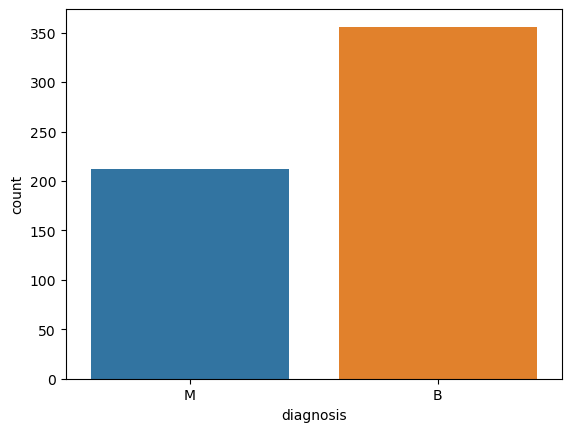

In [18]:
# Visualize class distribution
sns.countplot(x='diagnosis', data=MS4S16)
plt.show()

# SEPARATING FEATURE AND TARGET VARIABLES

In [19]:
X = MS4S16.drop(['diagnosis', 'id'], axis=1)
y = MS4S16['diagnosis']

# PERFORMING OVERSAMPLING

In [20]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)

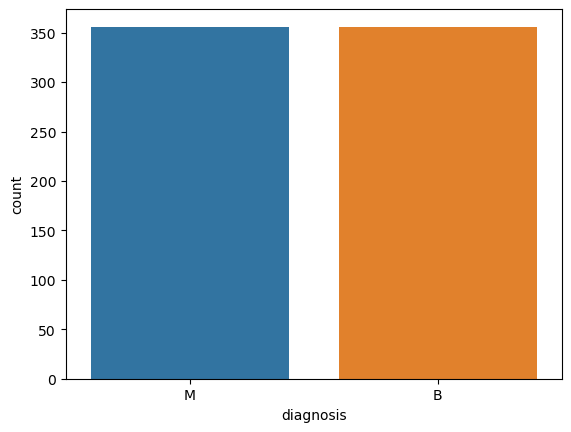

In [21]:
sns.countplot(x=y, data=MS4S16)
plt.show()

The class distribution analysis indicates that there are 356 instances of benign tumors (labelled as 'B') and 212 instances of malignant tumors (labelled as 'M') in the dataset. The distribution is shown in the countplot above.

An oversampling of the dataset was performed using Synthetic Minority Over-sampling Technique (SMOTE) to address the issue of class imbalance in the dataset. This was done by generating samples of the minority class to balance the class distribution. After this was done, the countplot now shows an equal distribution within the dataset.

# SCALING THE DATASET

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

The dataset is standardized using StandardScaler to scale the features to a mean of 0 and standard deviation of  1. The essence of  the scaling is to ensure there is an equal contribution from all features towards the model training.

# TRAIN TEST SPLIT

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# CLUSTERING

# K-MEANS CLUSTERING

In [30]:
MS4S16.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302.0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517.0,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903.0,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301.0,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402.0,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# LABEL ENCODER

In [31]:
from sklearn import preprocessing
le= preprocessing.LabelEncoder()
for i in range (0,MS4S16.shape[1]):
    if MS4S16.dtypes[i]=='object':
        MS4S16[MS4S16.columns[i]]=le.fit_transform(MS4S16[MS4S16.columns[i]])
        
MS4S16.head()

/tmp/ipykernel_18757/760801744.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if MS4S16.dtypes[i]=='object':
/tmp/ipykernel_18757/760801744.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if MS4S16.dtypes[i]=='object':
/tmp/ipykernel_18757/760801744.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MS4S16[MS4S16.columns[i]]=le.fit_transform(MS4S16[MS4S16.columns[i]])

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302.0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517.0,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903.0,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301.0,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402.0,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [32]:
from sklearn.cluster import KMeans

Text(0, 0.5, 'diagnosis')

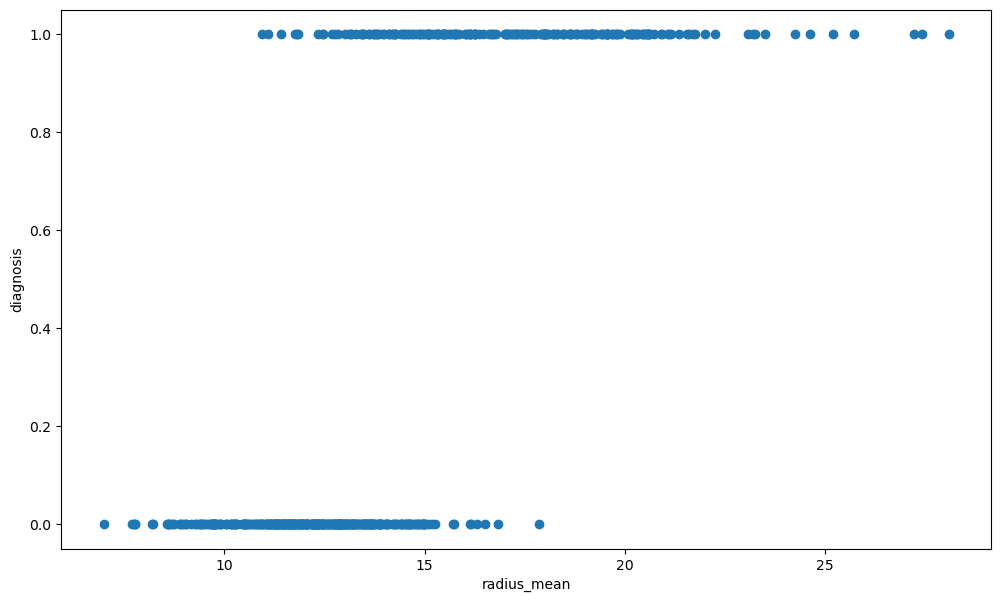

In [33]:
plt.figure(figsize =(12, 7))
plt.scatter(MS4S16['radius_mean'],MS4S16['diagnosis'])
plt.xlabel('radius_mean')
plt.ylabel('diagnosis')

In [34]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(MS4S16[['radius_mean','diagnosis']])
    sse.append(km.inertia_)

/Users/apple/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/apple/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/apple/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/apple/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/apple/anacond

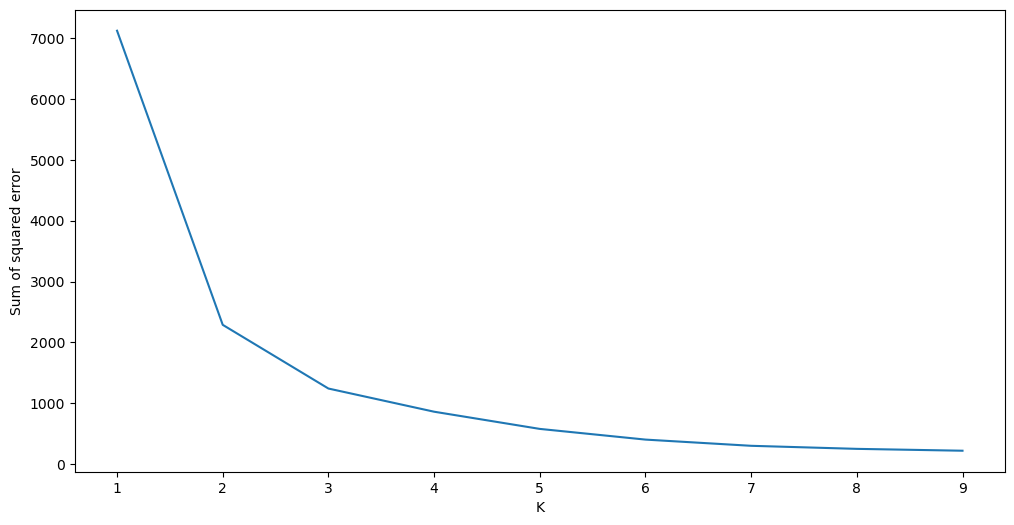

In [35]:
plt.figure(figsize =(12, 6))
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [36]:
km = KMeans(n_clusters=2)
y_predicted = km.fit_predict(MS4S16[['radius_mean','diagnosis']])
y_predicted

/Users/apple/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,

In [37]:
MS4S16['cluster']=y_predicted
MS4S16.head()

/tmp/ipykernel_18757/675235473.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MS4S16['cluster']=y_predicted


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,cluster
0,842302.0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,842517.0,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,84300903.0,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,84348301.0,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,84358402.0,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


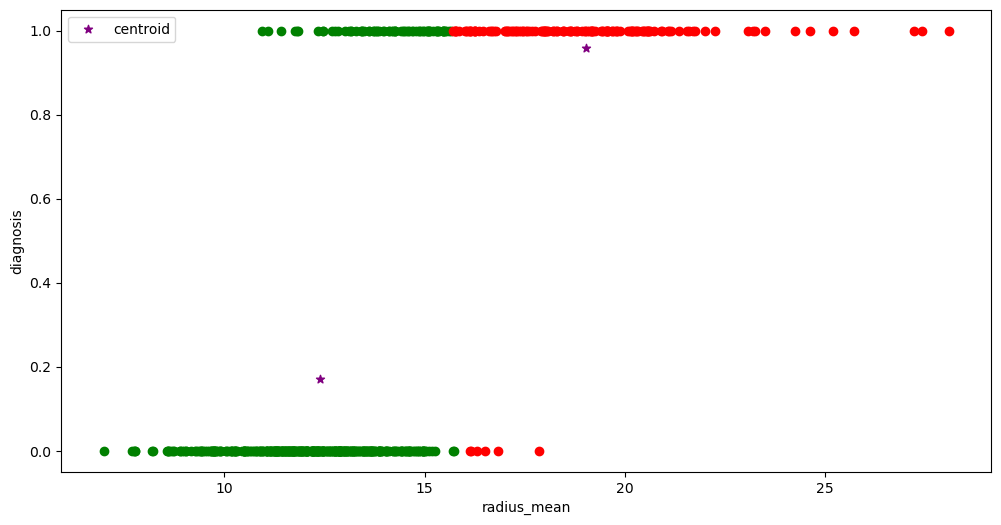

In [38]:
df1 = MS4S16[MS4S16.cluster==0]
df2 = MS4S16[MS4S16.cluster==1]


plt.figure(figsize =(12, 6))
plt.scatter(df1.radius_mean,df1['diagnosis'],color='green')
plt.scatter(df2.radius_mean,df2['diagnosis'],color='red')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('radius_mean')
plt.ylabel('diagnosis')
plt.legend()

# CLASSIFICATION

# CREATING A FUNCTION TO EVALUATE THE MODEL PERFORMANCE

After splitting the data into training and test set, the training data is fit and predicted using Logistic Regression, Random Forest classifier, Decision Tree.

In [39]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

def evaluate_model_performance(model, X_test, y_test):
    y_pred = model.predict(X_test)

    # Calculating the performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Print performance metrics
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)

    print("Classification Report:\n", classification_report(y_test, y_pred))

 

    # Create confusion matrix and display it as a heatmap
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Purples')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()

# RANDOM FOREST CLASSIFIER

Random Forest Results:
Accuracy: 0.951048951048951
Precision: 0.9511515479825339
Recall: 0.951048951048951
F1 Score: 0.9510537396083983
Classification Report:
               precision    recall  f1-score   support

           B       0.94      0.96      0.95        70
           M       0.96      0.95      0.95        73

    accuracy                           0.95       143
   macro avg       0.95      0.95      0.95       143
weighted avg       0.95      0.95      0.95       143



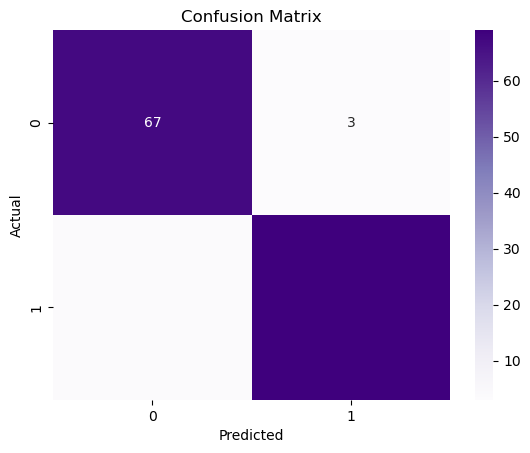

In [40]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier (random_state=42)
rf.fit(X_train, y_train)
print("Random Forest Results:")
rf_results = evaluate_model_performance(rf, X_test, y_test)

# DECISION TREE CLASSIFIER

Accuracy: 0.9300699300699301
Precision: 0.9300699300699301
Recall: 0.9300699300699301
F1 Score: 0.9300699300699301
Classification Report:
               precision    recall  f1-score   support

           B       0.93      0.93      0.93        70
           M       0.93      0.93      0.93        73

    accuracy                           0.93       143
   macro avg       0.93      0.93      0.93       143
weighted avg       0.93      0.93      0.93       143



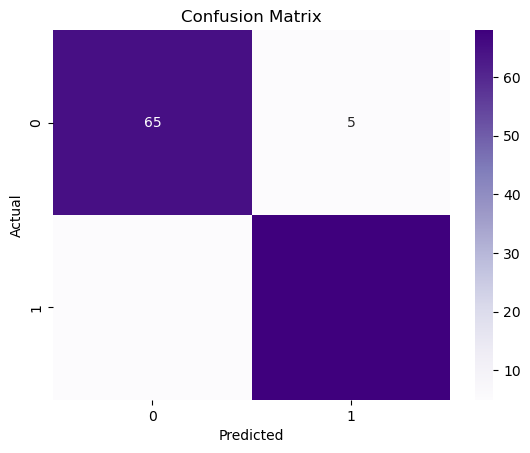

In [41]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
dt_results = evaluate_model_performance(dt, X_test, y_test)

# LOGISTIC REGRESSION

Accuracy: 0.965034965034965
Precision: 0.9658848001313755
Recall: 0.965034965034965
F1 Score: 0.965034965034965
Classification Report:
               precision    recall  f1-score   support

           B       0.95      0.99      0.97        70
           M       0.99      0.95      0.97        73

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



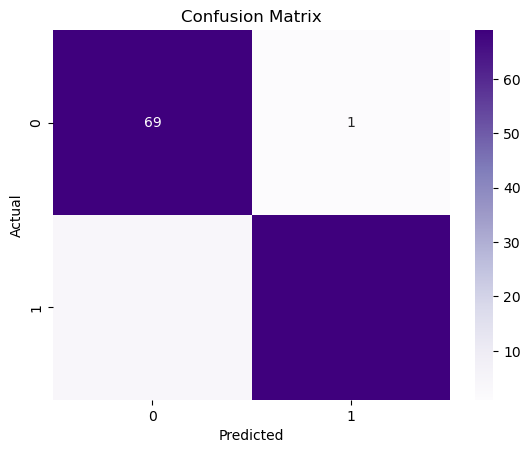

In [42]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)
lr_results = evaluate_model_performance(lr, X_test, y_test)

# K-NEAREST NEIGHBOUR

Accuracy: 0.958041958041958
Precision: 0.9584249865940009
Recall: 0.958041958041958
F1 Score: 0.9580460619193014
Classification Report:
               precision    recall  f1-score   support

           B       0.94      0.97      0.96        70
           M       0.97      0.95      0.96        73

    accuracy                           0.96       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143



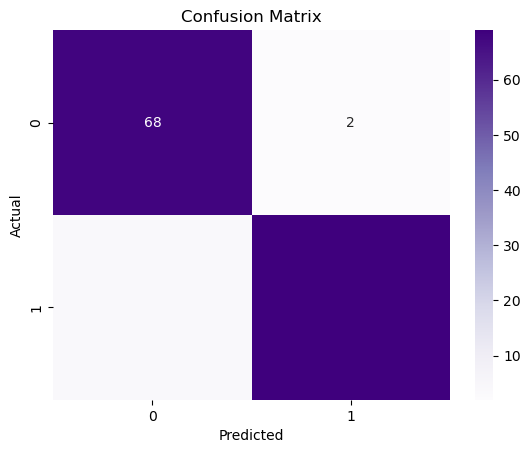

In [43]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_results = evaluate_model_performance(knn, X_test, y_test)

# SUPPORT VECTOR MACHINES

Accuracy: 0.958041958041958
Precision: 0.9584249865940009
Recall: 0.958041958041958
F1 Score: 0.9580460619193014
Classification Report:
               precision    recall  f1-score   support

           B       0.94      0.97      0.96        70
           M       0.97      0.95      0.96        73

    accuracy                           0.96       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143



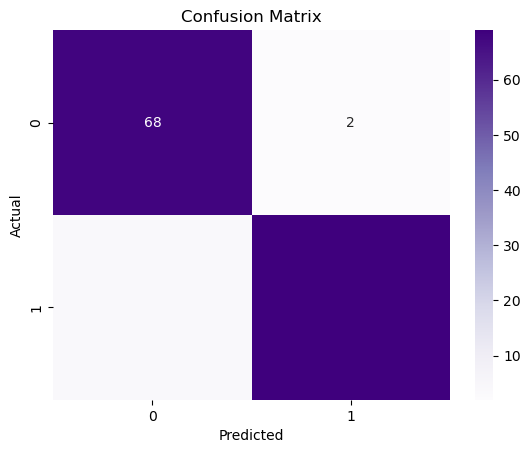

In [44]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
svm_results = evaluate_model_performance(svm, X_test, y_test)

# CONCLUSION

After thorough analysis, Logistic Regression performed best in predicting the values, so we select it as the final model. Logistic regression has an Accuracy score of 96.5%, a Precision score of 96.6%, a Recall score of 96.5% and an F1 score of 96.5% on the test dataset.This means that the model correctly predicted 96.5% of the samples in the dataset. 

This analysis demonstrates the potential of machine learning in breast cancer prediction, highlighting the importance of ethical considerations, rigorous validation, and ongoing research to ensure responsible and effective deployment in clinical practice.

Accurate classification of tumors as benign or malignant can aid in early detection and timely intervention, thereby improving patient outcomes.

# LIMITATIONS

1. Hyperparameter tuning could have helped with accurate results but it takes alot of time for the machine learning to process and this 
2. Clustering variables between 1 and 0 so the plot was on a straight line. If there were random variables, the plot could have been better

# REFERENCES


Towards Data Science (2024) Visualizing  Clusters with Pythons. Available at: https://towardsdatascience.com/visualizing-clusters-with-pythons-matplolib-35ae03d87489
(Accessed: 2 February 2024).

Towards Data Science (2024)  Understanding KMeans Clustering in Machine  Learning. Available at: https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1
(Accessed: 7 February 2024)

Google (2024) Preprocessing Data. Available at: https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-scaler
(Accessed: 7 February 2024)
